In [ ]:
""" Objetivo do programa: Plote um gráfico para a corrente da armadura e da velocidade angular do eixo do motor CC
Dados:
ra = 0.01
la = 1.0
B = 1.0
J = 5.0
km = 1.0

Corrente de armadura inicial é 75 A
Velocidade angular inicial é 0 rad/s
A tensão inicial na armadura é 50 V
O Torque inicial é 10 N.m

E sabendo que
va = 50 para t <= 60
va = 0 para t > 60

Tm = 10 para t <= 30
Tm = 30 para t > 30

"""

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Definindo tempo da simulação e dt
t_total = 100 # tempo total da simulação
dt = 0.001
npassos = int(t_total/dt)

In [28]:
# Definindo as cte
ra = 0.01 # resistencia da armadura
la = 1.0 # indutancia da armadura
B = 1.0 # cte de atrito
J = 5.0 # inercia do rotor
km = 1.0 # cte do motor

In [29]:
# Definindo ia, omega, va, Tm
ia = np.zeros(npassos) # Corrente de armadura
omega = np.zeros(npassos) # Velocidade angular
va = np.zeros(npassos) # tensão na armadura
Tm = np.zeros(npassos) # Torque
t = np.arange(npassos)*dt # Templo plotado

In [35]:
# Substituindo os valores iniciais
ia[0] = 75.0
omega[0] = 0 # Redundante!!
va[0] = 50.0
Tm[0] = 10.0

In [38]:
for i in range(npassos-1):
  if i <= 60/dt:
    va[i] = 50.0
  if i > 60/dt:
    va[i] = 0.0
  if i <= 30/dt:
    Tm[i] = 10.0
  if i > 30/dt:
    Tm[i] = 30.0

  ia[i+1] = ia[i] + (((va[i] - (km*omega[i]))/la) - ((ra/la)*ia[i]))*dt
  omega[i+1] = omega[i] + ((((km*ia[i]) - Tm[i])/J) - ((B/J)*omega[i]))*dt

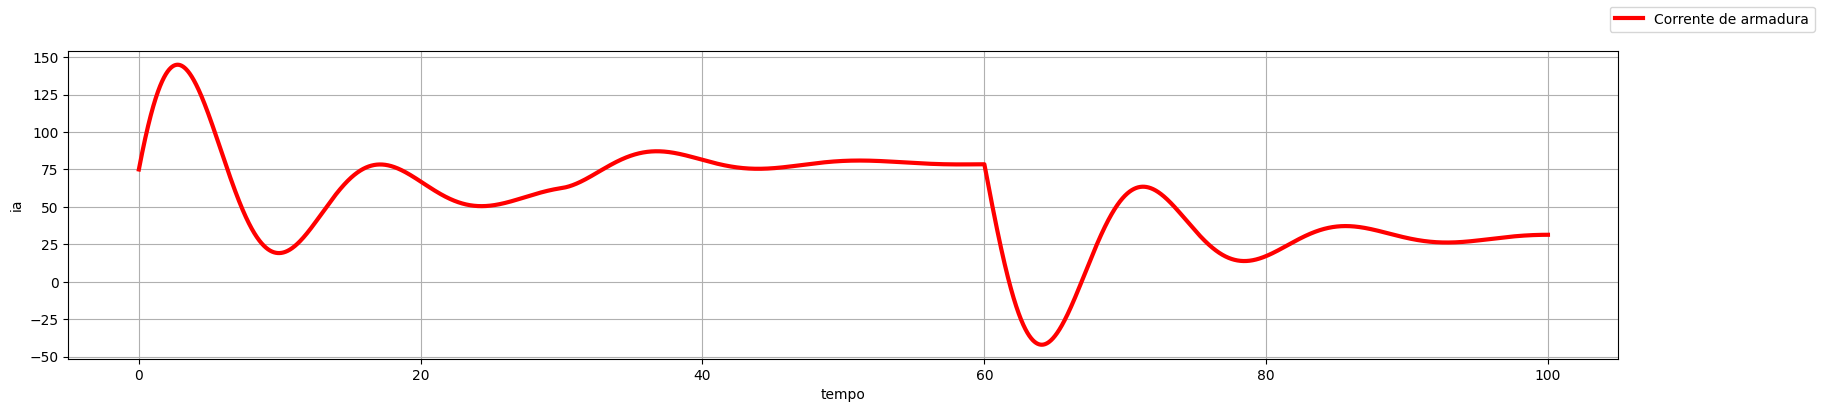

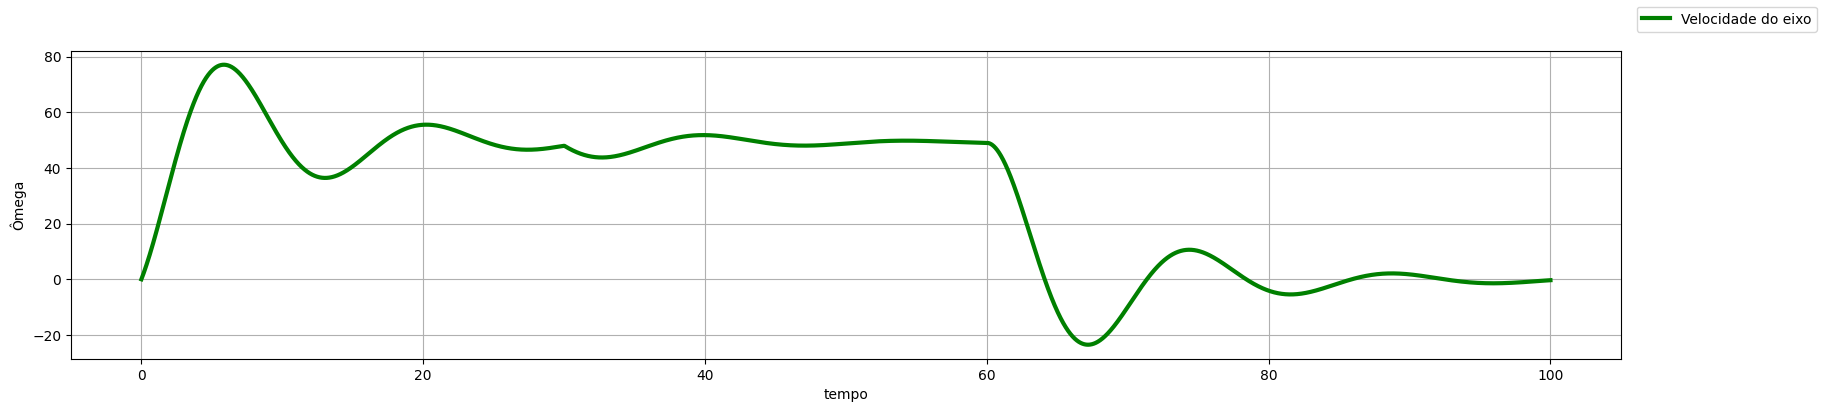

In [41]:
plt.figure(figsize=[20, 4])
fig = plt.figure(1); fig.clf()
plt.plot(t, ia,'r', lw=3, label='Corrente de armadura')
fig.legend(); plt.xlabel('tempo'); plt.ylabel('ia'); plt.grid()

plt.figure(figsize=[20, 4])
fig = plt.figure(2); fig.clf()
plt.plot(t, omega,'g', lw=3, label='Velocidade do eixo')
fig.legend(); plt.xlabel('tempo'); plt.ylabel('Ômega'); plt.grid()